## Auto Insurance Industry

## Aim of the Project

The aim of the project is to build a Machine Learning Model to predict whether an owner will initiate an auto insurance claim in the next year.

## The Problem

Auto insurance industry is witnessing a paradigm shift. Since auto insurance is a homogenous good (difficult to differentiate product A from product B), companies are fighting a price war. On top of that, distribution channel is shifting more from traditional insurance brokers to online purchase. This means that ability for companies to interact through human touch point is limited and customer should be quoted a good price. A good price quote is one which makes customer purchase the policy and helps the company to increase the profits.

Also, the insurance premium is calculated based on more than 50+ parameters. This means that traditional business analytics-based algorithms are now limited in their ability to differentiate among customers based on subtle parameters.

## EDA

## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import sklearn

In [2]:
data = pd.read_csv('insurance_industry.csv')
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [3]:
# Checking the datatypes of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484515 entries, 0 to 484514
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              484515 non-null  int64  
 1   target          484515 non-null  int64  
 2   ps_ind_01       484515 non-null  int64  
 3   ps_ind_02_cat   484515 non-null  int64  
 4   ps_ind_03       484515 non-null  int64  
 5   ps_ind_04_cat   484515 non-null  int64  
 6   ps_ind_05_cat   484515 non-null  int64  
 7   ps_ind_06_bin   484515 non-null  int64  
 8   ps_ind_07_bin   484515 non-null  int64  
 9   ps_ind_08_bin   484515 non-null  int64  
 10  ps_ind_09_bin   484515 non-null  int64  
 11  ps_ind_10_bin   484515 non-null  int64  
 12  ps_ind_11_bin   484515 non-null  int64  
 13  ps_ind_12_bin   484515 non-null  int64  
 14  ps_ind_13_bin   484515 non-null  int64  
 15  ps_ind_14       484515 non-null  int64  
 16  ps_ind_15       484515 non-null  int64  
 17  ps_ind_16_

In [4]:
# As -1 represents the null value here so replacing -1 with NaN
data_copied = data.copy()
data_unbalance = data.copy()
data_without_encoding = data.copy()

data_copied.replace(-1, np.nan, inplace=True)

In [5]:
# Checking the null values
data_copied.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        174
ps_ind_03              0
ps_ind_04_cat         67
ps_ind_05_cat       4752
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          87758
ps_car_01_cat         86
ps_car_02_cat          0
ps_car_03_cat     334735
ps_car_04_cat          0
ps_car_05_cat     216858
ps_car_06_cat          0
ps_car_07_cat       9336
ps_car_08_cat          0
ps_car_09_cat        456
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              4
ps_car_12              1
ps_car_13              0
ps_car_14          34707
ps_car_15              0
ps_calc_01             0


<AxesSubplot: >

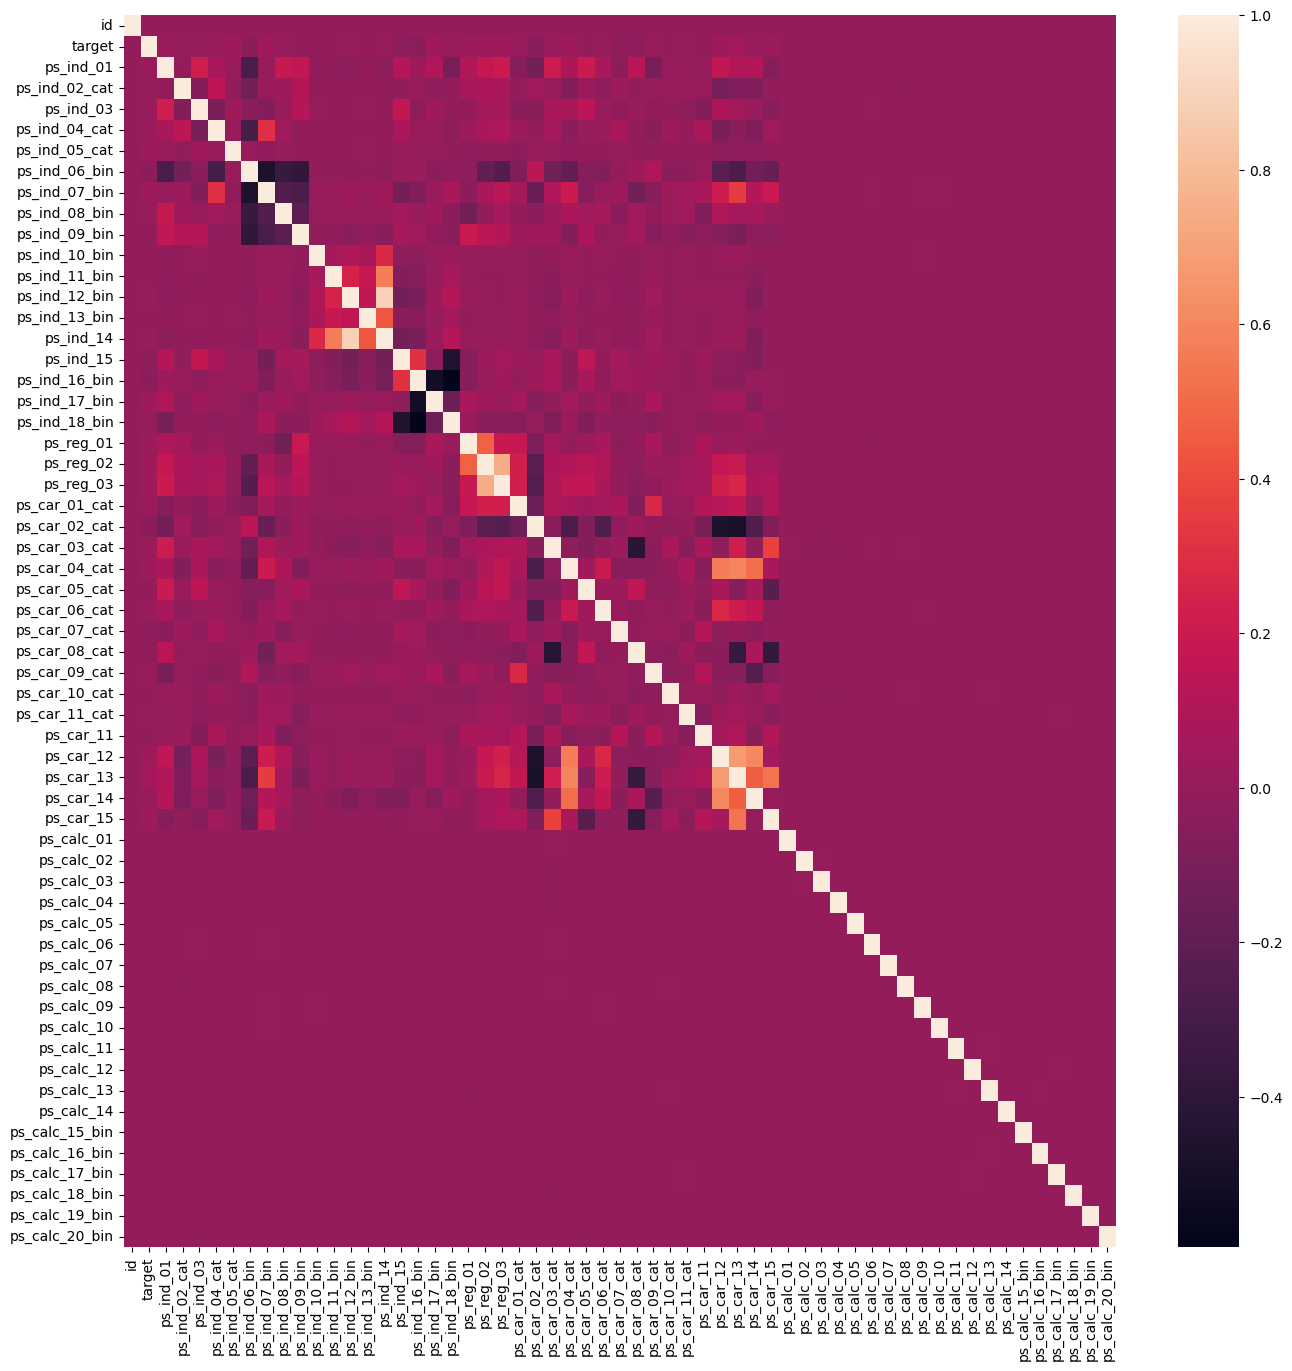

In [6]:
plt.figure(figsize=(16,16))
sns.heatmap(data_copied.corr())

In [7]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,4.845150e+05,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,...,484515.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000
mean,6.054639e+05,0.036403,1.899316,1.358961,4.424833,0.416833,0.405249,0.393804,0.256743,0.163815,...,5.440581,1.442134,2.872031,7.539031,0.122572,0.627487,0.554465,0.287567,0.348999,0.153217
std,3.494384e+05,0.187292,1.984144,0.664883,2.703095,0.493316,1.350298,0.488593,0.436837,0.370108,...,2.332006,1.203359,1.694234,2.747001,0.327946,0.483475,0.497025,0.452628,0.476654,0.360197
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.027285e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.051710e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,9.079120e+05,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.210835e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 1. Write at least 3 important inferences from the data above

### So from above we can bring out the following inferences:

1. The feature "id" is an unnecessary variable.

2. The features "ps_car_03_cat" and "ps_car_05_cat" have maximum number of missing values. So we'll remove these.

3. The following features are highly correlated to each other:

    * "ps_ind_06_bin" and "ps_ind_07_bin"
    * "ps_ind_16_bin" and "ps_ind_18_bin"
    * "ps_ind_16_bin" and "ps_ind_17_bin"
    * "ps_car_13" and "ps_car_02_cat"

4. We'll substitute the rest of the missing values either through mean or mode.

5. None of the feature is highly correlated to the target feature.

6. Features with calc are weakly correlated to all the other features.

### 2. Is the data balanced? Meaning are targets 0 and 1 in right proportion?

In [8]:
# Checking the distribution of values in the target column
data['target'].value_counts()

0    466877
1     17638
Name: target, dtype: int64

In [9]:
# Let's divide the features into- Binary, Categorical, Continuous, Ordinal
bina = []
cat = []
cont = []
ordi = []

column_names = list(data.columns)

for col in column_names:
    if col[-3:] == 'cat' or col == 'id':
        cat.append(col)
        
    elif col[-3:] == 'bin' or col == 'target':
        bina.append(col)
        
    elif data[col].dtype == 'int64':
        ordi.append(col)
        
    elif data[col].dtype == 'float64':
        cont.append(col) 

In [10]:
features_division = {'Binary': len(bina), 'Categorical': len(cat), 'Continuous': len(cont), 'Ordinal': len(ordi)}
features_division

{'Binary': 18, 'Categorical': 15, 'Continuous': 13, 'Ordinal': 13}

### 3. How many categorical features are there?

In [11]:
features_division['Categorical']

15

### 4. How many binary features are there?

In [12]:
features_division['Binary']

18

### 5. Write inferences from data on Interval variables.

In [13]:
df_interval = data[cont]
df_interval.head()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_12,ps_calc_13,ps_calc_14
0,0.7,0.2,0.718070,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,1.0,5.0,8.0
1,0.8,0.4,0.766078,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,1.0,1.0,9.0
2,0.0,0.0,-1.000000,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2.0,7.0,7.0
3,0.9,0.2,0.580948,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2.0,4.0,9.0
4,0.7,0.6,0.840759,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,1.0,1.0,3.0


In [14]:
df_interval.describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_12,ps_calc_13,ps_calc_14
count,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484514.000000,484514.000000,484514.000000
mean,0.611098,0.439998,0.551659,0.379898,0.813118,0.276202,3.065469,0.449873,0.449519,0.449837,1.442134,2.872031,7.539031
std,0.287824,0.404988,0.794082,0.058297,0.224352,0.357212,0.732906,0.287091,0.286884,0.287184,1.203359,1.694234,2.747001
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670882,0.333167,2.828427,0.200000,0.200000,0.200000,1.000000,2.000000,6.000000
50%,0.700000,0.300000,0.721110,0.374166,0.765838,0.368782,3.316625,0.500000,0.400000,0.500000,1.000000,3.000000,7.000000
75%,0.900000,0.600000,1.002497,0.400000,0.906154,0.396485,3.605551,0.700000,0.700000,0.700000,2.000000,4.000000,9.000000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000,10.000000,13.000000,23.000000


<AxesSubplot: >

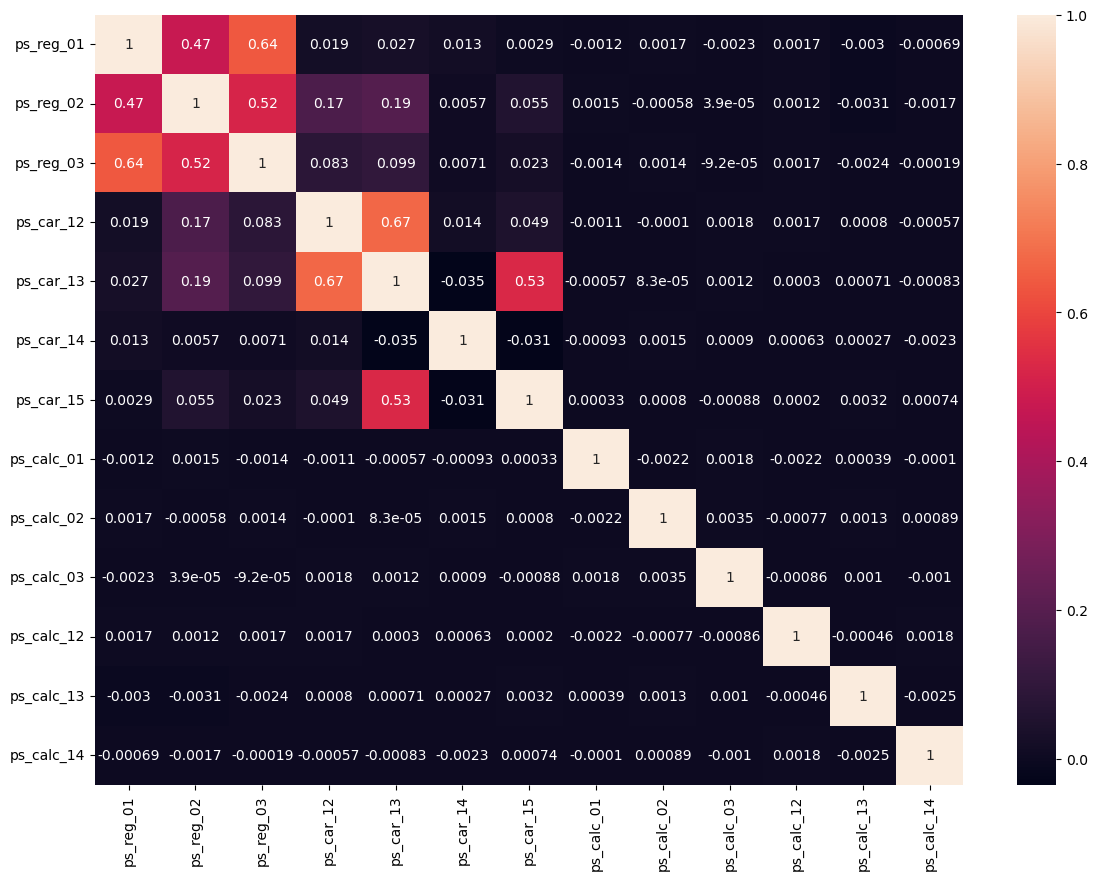

In [15]:
plt.figure(figsize=(14,10))
sns.heatmap(df_interval.corr(), annot=True)

1. We can see some of the variables are highly correlated like - ps_reg_01, ps_reg_02, ps_reg_03

2. ps_car_12 and ps_car_13 , ps_car_13 and ps_car_15 are also highly correlated

3. Other features are not significantly correlated.

4. From the above table, we can see that most of the features have low standard deviation.

### 6. Write inferences from data on ordinal variables.

In [16]:
df_ordinal = data[ordi]
df_ordinal.head()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11
0,2,5,0,11,2,3,1,10,1,10,1,5,9
1,1,7,0,3,3,2,1,9,5,8,1,7,3
2,5,9,0,12,1,2,2,9,1,8,2,7,4
3,0,2,0,8,1,2,4,7,1,8,4,2,2
4,0,0,0,9,3,2,2,6,3,10,2,12,3


In [17]:
df_ordinal.describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11
count,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000
mean,1.899316,4.424833,0.012441,7.302542,2.345312,2.370255,1.886641,7.688734,3.006227,9.224786,2.339088,8.432399,5.440581
std,1.984144,2.703095,0.127974,3.546874,0.832713,1.117035,1.135124,1.335060,1.413926,1.460238,1.246629,2.906006,2.332006
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000


<AxesSubplot: >

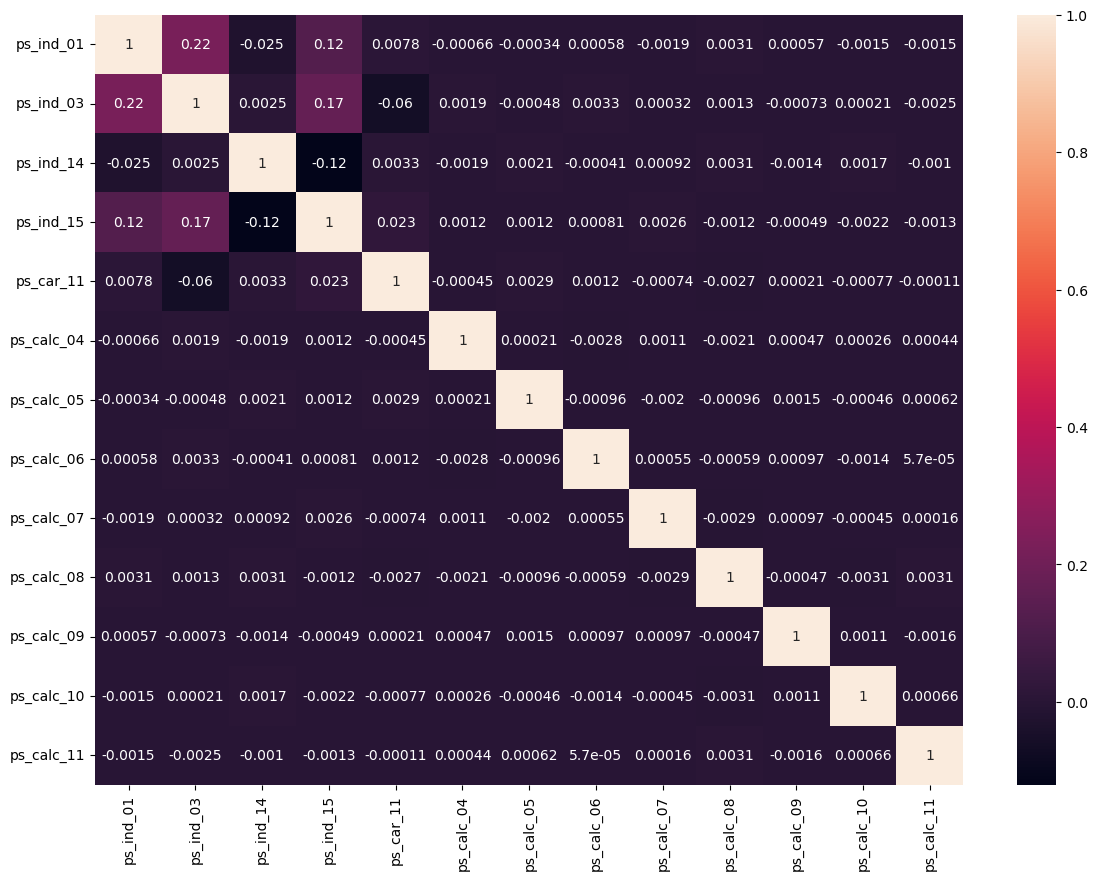

In [18]:
plt.figure(figsize=(14,10))
sns.heatmap(df_ordinal.corr(),annot=True)

#### 1. ps_ind_06_bin and ps_ind_07_bin are significantly correlated in 'ind' variables.

#### 2. Very few ordinal variables are correlated to each other

#### 3. Other features are not correlated.

#### 4. From the above table, we can say that ps_ind_14 has 0 value in first, second and third quantile.

#### 5. ps_ind_14 and ps_car_11 have low standard deviation

### 7. Write inferences from data on binary variables.

In [19]:
df_binary = data[bina]
df_binary.head()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,1.0,1.0,0.0,0.0,1.0
1,0,0,0,1,0,0,0,0,0,0,0,1,0.0,1.0,1.0,0.0,1.0,0.0
2,0,0,0,1,0,0,0,0,0,1,0,0,0.0,1.0,1.0,0.0,1.0,0.0
3,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,0,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,1.0,0.0


In [20]:
df_binary.describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484515.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000,484514.000000
mean,0.036403,0.393804,0.256743,0.163815,0.185637,0.000392,0.001719,0.009364,0.000966,0.661088,0.120686,0.153488,0.122572,0.627487,0.554465,0.287567,0.348999,0.153217
std,0.187292,0.488593,0.436837,0.370108,0.388814,0.019799,0.041428,0.096314,0.031064,0.473340,0.325762,0.360457,0.327946,0.483475,0.497025,0.452628,0.476654,0.360197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot: >

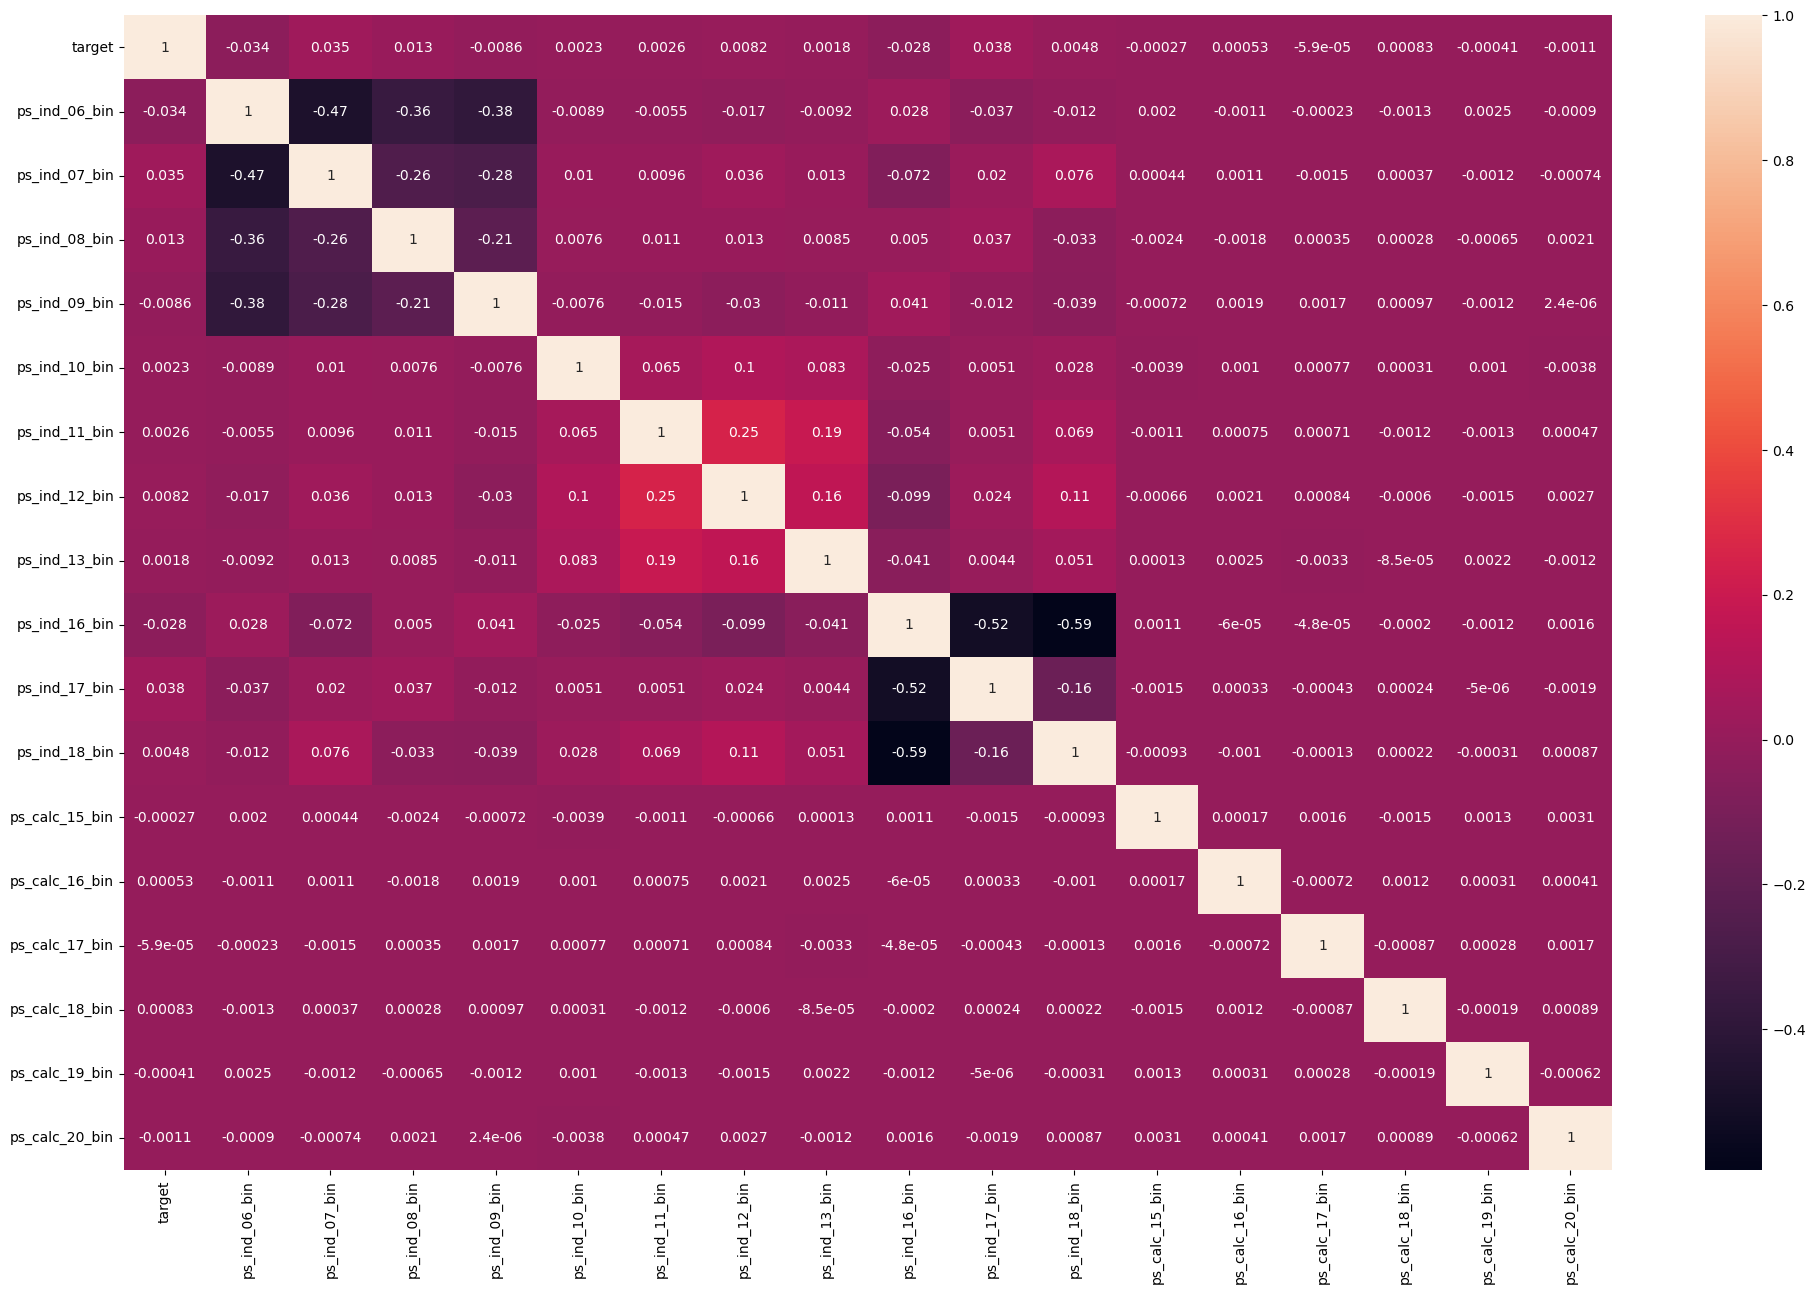

In [21]:
plt.figure(figsize=(24,15))
sns.heatmap(df_binary.corr(),annot=True)

#### Few ind features like ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin and ps_ind_09_bin are significantly correlated unlike others.

### 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

In [22]:
counts = data['target'].value_counts()
counts

0    466877
1     17638
Name: target, dtype: int64

<AxesSubplot: xlabel='target', ylabel='count'>

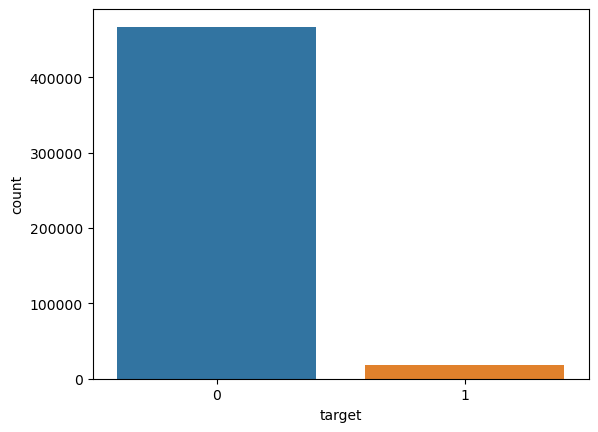

In [23]:
sns.countplot(x= 'target', data=data)

In [24]:
percentage_of_zero = counts[0]/len(data['target']) * 100
percentage_of_zero

96.35965862769986

In [25]:
percentage_of_one = 100-percentage_of_zero
percentage_of_one

3.640341372300142

#### This shows that data with 0 as target value are 96.35% and 1 has only 3.64% of data. This is sign of imbalance

### 9. What should be the preferred way in this case to balance the data?

As we have the following number of different target classes: 0-->466877 and 1-->17638. As our data is not in millions so it's better to go for Oversampling rather than undersampling.

For oversampling we will use **SMOTE** method.

In [26]:
from imblearn.over_sampling import SMOTE

In [27]:
smote_obj = SMOTE(random_state=23)

In [28]:
data_new = data[np.isfinite(data).all(1)]

In [29]:
x_b = data_new.drop(['target'], axis=1)
y_b = data_new['target']

In [30]:
x_smote, y_smote = smote_obj.fit_resample(x_b, y_b)

In [31]:
type(x_smote)

pandas.core.frame.DataFrame

In [32]:
x_smote

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1.000000,5.000000,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
1,9,1,1,7,0,0,0,0,1,0,...,3,1.000000,1.000000,9.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
2,13,5,4,9,1,0,0,0,1,0,...,4,2.000000,7.000000,7.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
3,16,0,1,2,0,0,1,0,0,0,...,2,2.000000,4.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17,0,2,0,1,0,1,0,0,0,...,3,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933747,1188458,0,1,4,0,0,0,0,0,0,...,3,0.000000,0.031151,5.062302,0.968849,1.000000,0.968849,0.031151,0.000000,0.968849
933748,47405,2,3,8,0,0,0,0,0,0,...,8,1.792529,1.452300,5.037357,0.207471,1.000000,0.207471,0.792529,0.000000,0.000000
933749,921771,3,1,6,1,0,0,1,0,0,...,7,1.281009,2.281009,8.248071,0.718991,0.718991,0.718991,0.000000,0.000000,0.718991
933750,326386,0,1,7,0,0,0,0,0,0,...,4,0.000000,3.792237,6.000000,0.000000,0.650970,0.349030,0.000000,0.349030,0.000000


In [33]:
x_smote.shape, y_smote.shape

((933752, 58), (933752,))

In [34]:
col = list(data.columns)
col.remove('target')
col

['id',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [35]:
x_smote.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,1,1,7,0,0,0,0,1,0,...,3,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,5,4,9,1,0,0,0,1,0,...,4,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,1,2,0,0,1,0,0,0,...,2,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,2,0,1,0,1,0,0,0,...,3,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [36]:
y_smote.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [37]:
y_smote = pd.DataFrame(y_smote, columns=['target'])
y_smote.head()

,target
0,0
1,0
2,0
3,0
4,0


In [38]:
zero = y_smote[y_smote['target']==0].count()
ones = y_smote[y_smote['target']==1].count()

In [39]:
zero

target    466876
dtype: int64

In [40]:
ones

target    466876
dtype: int64

In [41]:
data_copied = pd.concat([x_smote, y_smote], axis=1)
data_copied.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


In [42]:
len(data_copied.columns)

59

### 10. How many training records are there after achieving balance of 12 %?

In [43]:
smote_ratio = SMOTE(sampling_strategy=0.12)

In [44]:
x_s, y_s = smote_ratio.fit_resample(x_b, y_b)

In [45]:
type(x_s)

pandas.core.frame.DataFrame

In [46]:
x_s.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,2,2,5,1,0,0,1,0,0,...,9,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,1,1,7,0,0,0,0,1,0,...,3,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,5,4,9,1,0,0,0,1,0,...,4,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,1,2,0,0,1,0,0,0,...,2,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,2,0,1,0,1,0,0,0,...,3,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


In [47]:
type(y_s)

pandas.core.series.Series

In [48]:
y_s = pd.DataFrame(y_s, columns=['target'])
y_s.head()

,target
0,0
1,0
2,0
3,0
4,0


In [49]:
zero = y_smote[y_smote['target']==0].count()
ones = y_smote[y_smote['target']==1].count()

In [50]:
zero

target    466876
dtype: int64

In [51]:
ones

target    466876
dtype: int64

In [52]:
x_s.shape

(522901, 58)

In [53]:
y_s.shape

(522901, 1)

In [54]:
data_copied = pd.concat([x_s, y_s], axis=1)
data_copied.columns

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin', 'target'],


### 11. Which are the top two features in terms of missing values?

In [55]:
data_copied.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
count,5.229010e+05,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,...,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000,522901.000000
mean,6.051087e+05,1.882972,1.344079,4.401107,0.400705,0.411877,0.371820,0.246119,0.154568,0.173955,...,1.441017,2.872086,7.541708,0.122653,0.627707,0.554318,0.287832,0.348845,0.153090,0.107143
std,3.494487e+05,1.960113,0.652530,2.674743,0.490303,1.339086,0.483291,0.430749,0.361493,0.379071,...,1.188022,1.673673,2.713291,0.324028,0.477472,0.490986,0.447193,0.470850,0.355722,0.309295
min,7.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.023340e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.047860e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,9.073560e+05,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.210834e+06,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Replacing -1 with null in data_copied
data_copied.replace(-1, np.nan, inplace=True)

In [57]:
data_copied.shape, data_unbalance.shape, data_without_encoding.shape

((522901, 59), (484515, 59), (484515, 59))

In [58]:
# Replacing -1 with null in data_unbalance and data_without_encoding
data_unbalance.replace(-1, np.nan, inplace=True)
data_without_encoding.replace(-1, np.nan, inplace=True)

In [59]:
data_copied.isna().sum()

id                     0
ps_ind_01              0
ps_ind_02_cat        174
ps_ind_03              0
ps_ind_04_cat         67
ps_ind_05_cat       4768
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          88538
ps_car_01_cat         86
ps_car_02_cat          0
ps_car_03_cat     349749
ps_car_04_cat          0
ps_car_05_cat     222850
ps_car_06_cat          0
ps_car_07_cat       9395
ps_car_08_cat          0
ps_car_09_cat        456
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              4
ps_car_12              1
ps_car_13              0
ps_car_14          34944
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


In [60]:
missing_values_columns = []
count=0
for i in data_copied.columns:
    if data_copied[i].isna().sum() > 0:
        missing_values_columns.append(i)
        number = data_copied[i].isna().sum()/ len(data_copied[i])
        print("The column {} is having {} percent of missing values.".format(i, number*100))
        count+=1

The column ps_ind_02_cat is having 0.0332758973495939 percent of missing values.
The column ps_ind_04_cat is having 0.012813132887487306 percent of missing values.
The column ps_ind_05_cat is having 0.911836083694619 percent of missing values.
The column ps_reg_03 is having 16.932077008841063 percent of missing values.
The column ps_car_01_cat is having 0.01644670788543147 percent of missing values.
The column ps_car_03_cat is having 66.88627483978803 percent of missing values.
The column ps_car_05_cat is having 42.618009910097705 percent of missing values.
The column ps_car_07_cat is having 1.796707216088705 percent of missing values.
The column ps_car_09_cat is having 0.08720579995065987 percent of missing values.
The column ps_car_11 is having 0.0007649631574619288 percent of missing values.
The column ps_car_12 is having 0.0001912407893654822 percent of missing values.
The column ps_car_14 is having 6.68271814358741 percent of missing values.


#### The features ps_car_05_cat and ps_car_03_cat are having the maximum number of missing values

### 12. In total how many features have missing values?

In [61]:
print("Total number of missing values features are: %d"%(len(missing_values_columns)))

Total number of missing values features are: 12


In [62]:
missing_values_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

### 13. What steps should be taken to handle the missing data?

We'll drop the feature columns ps_car_05_cat and ps_car_03_cat as they have maximum number of missing values and for the rest of the columns we'll treat them using mean and mode

In [63]:
# Dropping the feature columns ps_car_05_cat and ps_car_03_cat from data_copied
data_copied.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)
missing_values_columns.remove("ps_car_05_cat")
missing_values_columns.remove("ps_car_03_cat")
missing_values_columns

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [64]:
# Dropping the feature columns ps_car_05_cat and ps_car_03_cat from data_unbalance and data_without_encoding
data_unbalance.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)
data_without_encoding.drop(["ps_car_05_cat" , "ps_car_03_cat"], axis=1, inplace=True)

In [65]:
# Removing "ps_car_05_cat" , "ps_car_03_cat" from cat list
cat.remove("ps_car_05_cat")
cat.remove("ps_car_03_cat")
cat

['id',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [66]:
# Treating other missing values columns of data_copied
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_copied[col].fillna(data_copied[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_copied[col].dtype == 'int64':
        data_copied[col].fillna(data_copied[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_copied[col].dtype == 'float64':
        data_copied[col].fillna(data_copied[col].mean(), inplace=True)       # Treating continuous columns

In [67]:
# Treating other missing values columns of data_unbalance
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_unbalance[col].fillna(data_unbalance[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_unbalance[col].dtype == 'int64':
        data_unbalance[col].fillna(data_unbalance[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_unbalance[col].dtype == 'float64':
        data_unbalance[col].fillna(data_unbalance[col].mean(), inplace=True)       # Treating continuous columns

In [68]:
data_unbalance.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        1
ps_calc_13        1


In [69]:
# Treating other missing values columns of data_without_encoding
for col in missing_values_columns:
    if col[-3:] == 'cat':
        data_without_encoding[col].fillna(data_without_encoding[col].mode()[0], inplace=True)  # Treating categorical columns
        
    elif data_without_encoding[col].dtype == 'int64':
        data_without_encoding[col].fillna(data_without_encoding[col].mode()[0], inplace=True)  # Treating ordinal columns
        
    elif data_without_encoding[col].dtype == 'float64':
        data_without_encoding[col].fillna(data_without_encoding[col].mean(), inplace=True)       # Treating continuous columns

In [70]:
data_without_encoding.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_04_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        1
ps_calc_13        1


In [71]:
# Checking the number of null values in our dataset
number_of_columns_with_missingvalues = 0
for i in data_copied.isna().sum():
    if i>0:
        number_of_columns_with_missingvalues += 1
        
number_of_columns_with_missingvalues

0

Thus, now there are no more missing values

### 14. Which interval variables have strong correlation?

<AxesSubplot: >

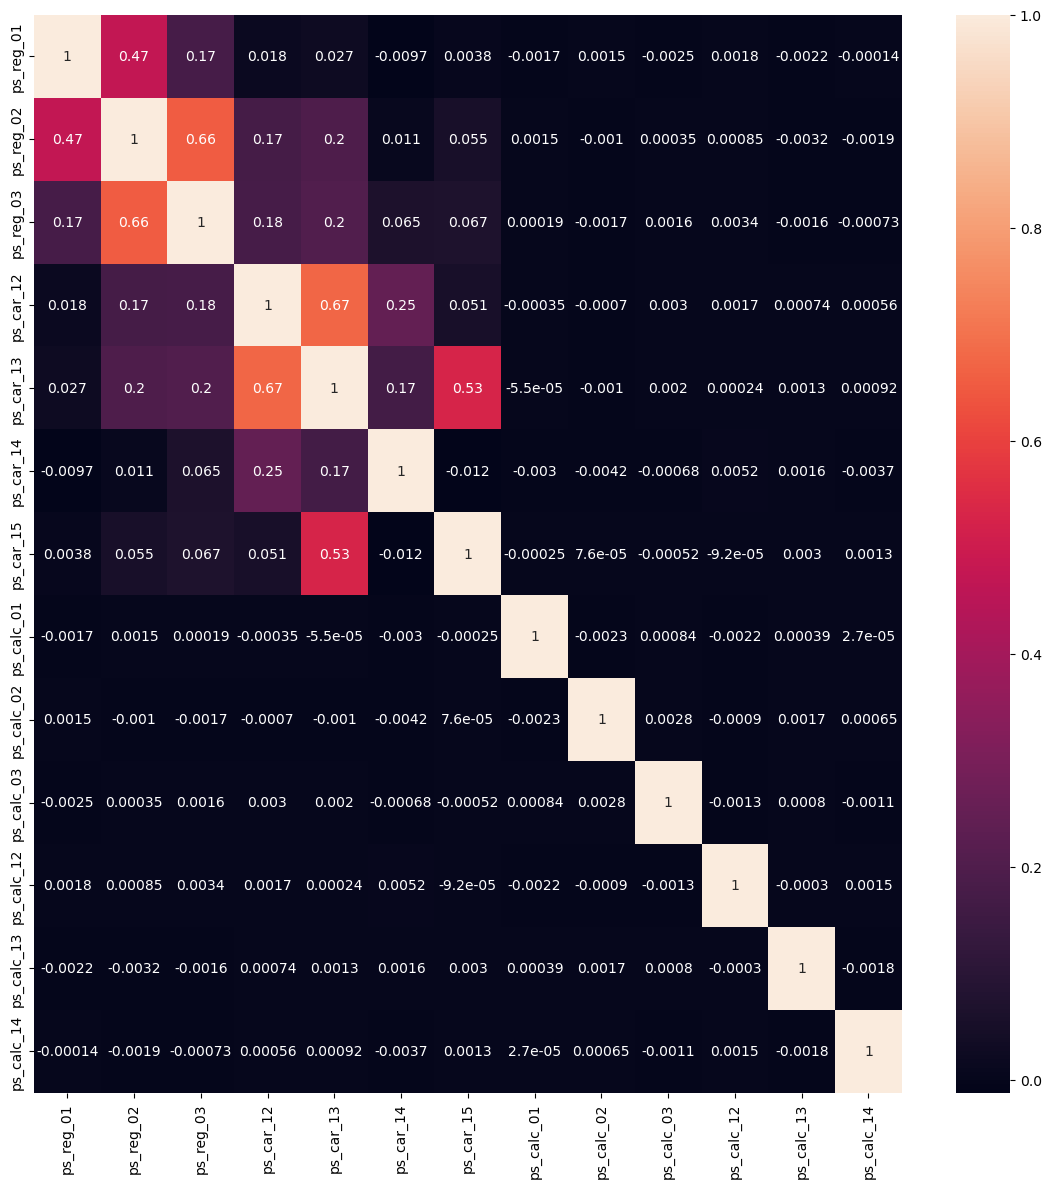

In [72]:
plt.figure(figsize=(14,14))
sns.heatmap(data_copied[cont].corr(), annot=True)

#### The features ps_car_12 and ps_car_13 have the highest correlation of 67%

### 15. What's the level of correlation among ordinal features?

<AxesSubplot: >

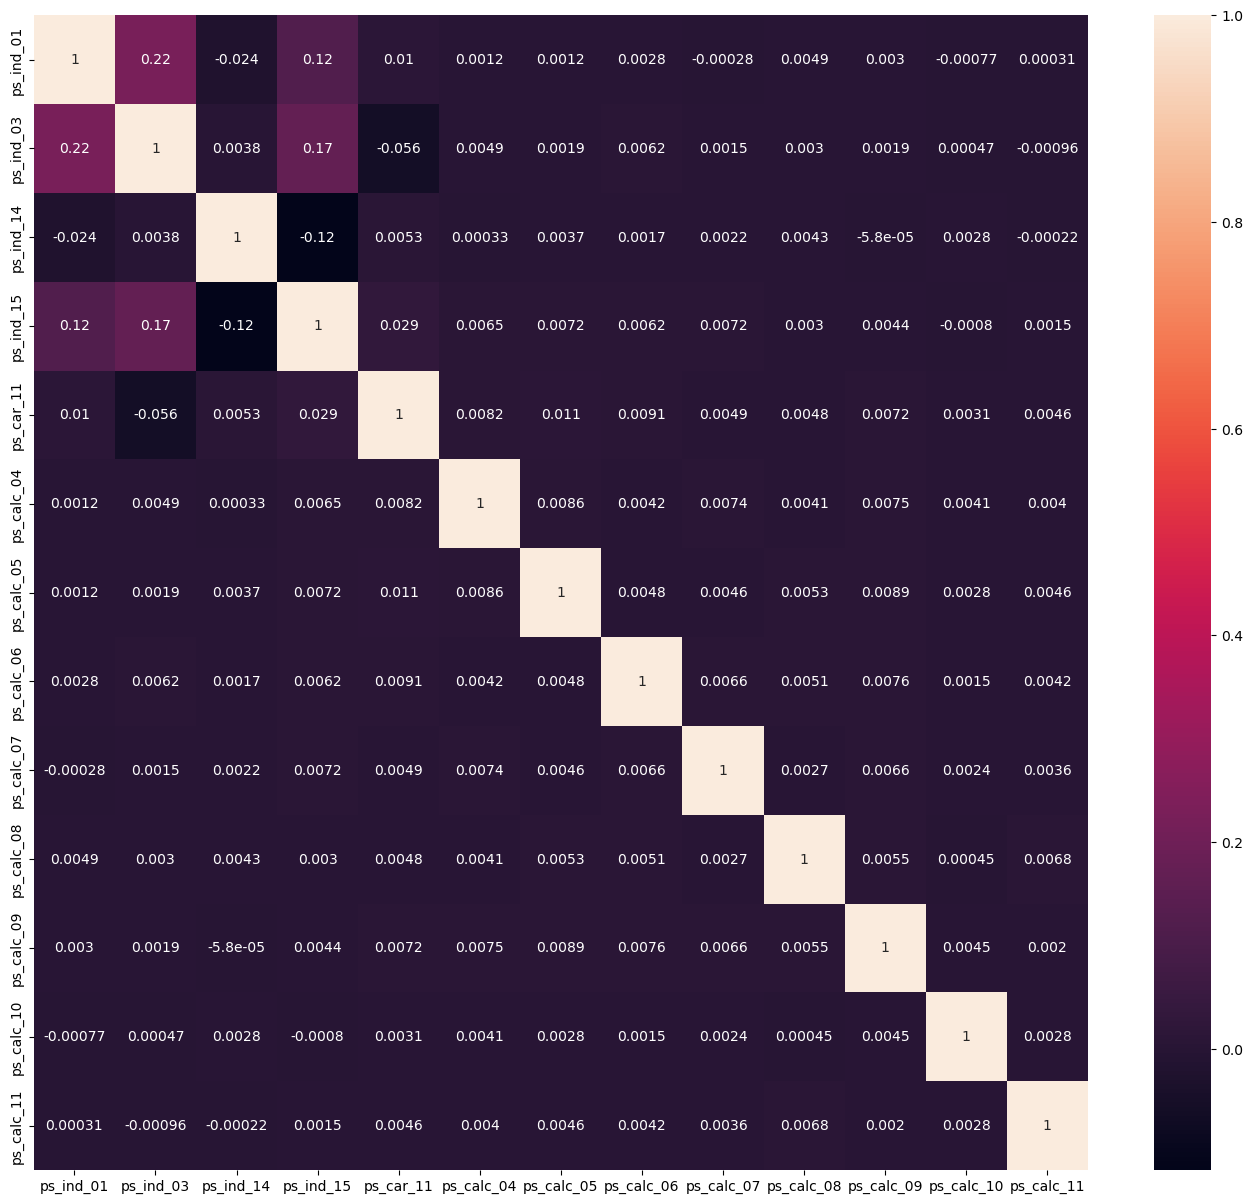

In [73]:
plt.figure(figsize=(17,15))
sns.heatmap(data_copied[ordi].corr(), annot=True)

#### Ordinal variable are weakly correlated to each other

### 16. Implement Hot Encoding for categorical features

In [74]:
# Checking the categorical features
cat

['id',
 'ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

In [75]:
cat_value_count = {}

for col in cat:
    cat_value_count[col] = data_copied[col].value_counts().count()
    
cat_value_count

{'id': 506020,
 'ps_ind_02_cat': 5,
 'ps_ind_04_cat': 2,
 'ps_ind_05_cat': 7,
 'ps_car_01_cat': 12,
 'ps_car_02_cat': 2,
 'ps_car_04_cat': 10,
 'ps_car_06_cat': 18,
 'ps_car_07_cat': 2,
 'ps_car_08_cat': 2,
 'ps_car_09_cat': 5,
 'ps_car_10_cat': 3,
 'ps_car_11_cat': 104}

In [76]:
data_copied.shape

(522901, 57)

As "id" is a irrelevant features so we'll remove it

In [77]:
data_copied.drop(['id'], axis=1, inplace=True)
data_unbalance.drop(['id'], axis=1, inplace=True)
data_without_encoding.drop(['id'], axis=1, inplace=True)

In [78]:
data_copied.shape, data_unbalance.shape, data_without_encoding.shape

((522901, 56), (484515, 56), (484515, 56))

In [79]:
# Removing "id" feature from cat list
cat.remove("id")
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat']

#### As the feature ps_car_11_cat has 104 unique values so we we'll not convert this feature using one-hot encoding, rest we'll do.

In [80]:
cat.remove('ps_car_11_cat')

In [81]:
cat

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat']

In [82]:
before_encoding_balanced = data_copied.copy()
before_encoding_balanced.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,target
0,2,2.0,5,1.0,0.0,0,1,0,0,0,...,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0,0
1,1,1.0,7,0.0,0.0,0,0,1,0,0,...,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2,5,4.0,9,1.0,0.0,0,0,1,0,0,...,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0,0
3,0,1.0,2,0.0,0.0,1,0,0,0,0,...,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,2.0,0,1.0,0.0,1,0,0,0,0,...,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0


In [83]:
# Applying get_dummies over categorical columns
dummy_df = pd.get_dummies(data_copied, columns=cat, drop_first=True)
dummy_df.head()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,...,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_1.0,ps_car_08_cat_1,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_1,ps_car_10_cat_2
0,2,5,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,7,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
2,5,9,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
3,0,2,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0


In [84]:
dummy_df.shape

(522901, 102)

In [85]:
print("Number of features before applying get_dummies are: %d"%data_copied.shape[1])
print("Number of features after applying get_dummies are: %d"%dummy_df.shape[1])

Number of features before applying get_dummies are: 56
Number of features after applying get_dummies are: 102


In [86]:
# Columns present in dummy_df
columns_after_dummy = list(dummy_df.columns)
columns_after_dummy

['ps_ind_01',
 'ps_ind_03',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin',
 'target',
 'ps_ind_02_cat_1.0',
 'ps_ind_02_cat_2.0',
 'ps_ind_02_cat_3.0',
 'ps_ind_02_cat_4.0',
 'ps_ind_04_cat_1.0',
 'ps_ind_05_cat_1.0',
 'ps_ind_05_cat_2.0',
 'ps_ind_05_cat_3.0',
 'ps_ind_05_cat_4.0',
 'ps_ind_05_cat_5.0',
 'ps_ind_05_cat_6.0',
 'ps_car_01_cat_1.0',
 'ps_car_01_cat_2

#### As we can see from above heatmaps that calculated features neither have any correlation with the target nor with other features. So we'll remove all the cal features

In [87]:
final_col = [i for i in columns_after_dummy if 'calc' not in i]
len(final_col)

82

In [88]:
df_with_outliers = dummy_df[final_col]
df_with_outliers.shape

(522901, 82)

In [89]:
overall_outliers = []
for i in final_col:
    if df_with_outliers[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(df_with_outliers[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(df_with_outliers[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = df_with_outliers[(df_with_outliers[i]<q1-iqr) | (df_with_outliers[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers.extend(outliers)        

The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 32219 outliers
The feature ps_reg_03 has 33732 outliers
The feature ps_car_11 has 23134 outliers
The feature ps_car_12 has 10603 outliers
The feature ps_car_13 has 23170 outliers
The feature ps_car_14 has 23928 outliers
The feature ps_car_15 has 23394 outliers


#### Not all the outliers rows will be removed. Only those indexes of the dataframe will be removed which are common.

In [90]:
len(overall_outliers)

170180

In [91]:
common_rows =  list((Counter(overall_outliers) - Counter(set(overall_outliers))).keys())
len(common_rows)

36941

In [92]:
# Removing outliers rows:
df_after_outliers = df_with_outliers.drop(index=common_rows, axis=0)
print("The shape after outliers removal is {}".format(df_after_outliers.shape))

The shape after outliers removal is (485960, 82)


In [93]:
df_after_outliers = df_after_outliers.reset_index(drop=True)

In [94]:
df_after_outliers.shape

(485960, 82)

In [95]:
# Removing outliers from 
#before_encoding_balanced
overall_outliers1 = []
for i in before_encoding_balanced.columns:
    if before_encoding_balanced[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(before_encoding_balanced[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(before_encoding_balanced[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = before_encoding_balanced[(before_encoding_balanced[i]<q1-iqr) | (before_encoding_balanced[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers1.extend(outliers)        

print("\n\n==========================================\n\n\n\n")

#data_unbalance
overall_outliers2 = []
for i in data_unbalance.columns:
    if data_unbalance[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(data_unbalance[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(data_unbalance[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = data_unbalance[(data_unbalance[i]<q1-iqr) | (data_unbalance[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers2.extend(outliers)        

print("===============================\n\n\n\n")
        
#data_without_encoding
overall_outliers3 = []
for i in data_without_encoding.columns:
    if data_without_encoding[i].dtype == 'float64':
        # Calculating the first quartile
        q1 = np.percentile(data_without_encoding[i], 25)
        # Calculating the third quartile
        q3 = np.percentile(data_without_encoding[i], 75)
        # IQR- Inter quartile range:
        iqr = (q3-q1)*1.5
        
        outliers = data_without_encoding[(data_without_encoding[i]<q1-iqr) | (data_without_encoding[i]>q3+iqr)].index.values
        print("The feature {} has {} outliers".format(i, len(outliers)))
        overall_outliers3.extend(outliers)  

The feature ps_ind_02_cat has 9309 outliers
The feature ps_ind_04_cat has 0 outliers
The feature ps_ind_05_cat has 57478 outliers
The feature ps_reg_01 has 0 outliers
The feature ps_reg_02 has 32219 outliers
The feature ps_reg_03 has 33732 outliers
The feature ps_car_01_cat has 4946 outliers
The feature ps_car_07_cat has 32823 outliers
The feature ps_car_09_cat has 0 outliers
The feature ps_car_11 has 23134 outliers
The feature ps_car_12 has 10603 outliers
The feature ps_car_13 has 23170 outliers
The feature ps_car_14 has 23928 outliers
The feature ps_car_15 has 23394 outliers
The feature ps_calc_01 has 0 outliers
The feature ps_calc_02 has 0 outliers
The feature ps_calc_03 has 0 outliers
The feature ps_calc_12 has 30086 outliers
The feature ps_calc_13 has 4622 outliers
The feature ps_calc_14 has 13499 outliers
The feature ps_calc_15_bin has 68221 outliers
The feature ps_calc_16_bin has 0 outliers
The feature ps_calc_17_bin has 0 outliers
The feature ps_calc_18_bin has 0 outliers
The f

In [96]:
# Common rows for:
#before_encoding_balanced
common_rows1 =  list((Counter(overall_outliers1) - Counter(set(overall_outliers1))).keys())
print(len(common_rows1))

print("\n\n==============\n\n")


#data_unbalance
common_rows2 =  list((Counter(overall_outliers2) - Counter(set(overall_outliers2))).keys())
print(len(common_rows2))

print("\n\n==============\n\n")



#data_without_encoding
common_rows3 =  list((Counter(overall_outliers3) - Counter(set(overall_outliers3))).keys())
print(len(common_rows3))

121106




55475




55475


In [97]:
# Removing outliers rows from:
#before_encoding_balanced
before_encoding_balanced.drop(index=common_rows1, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(before_encoding_balanced.shape))


#data_unbalance
data_unbalance.drop(index=common_rows2, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(data_unbalance.shape))


#data_without_encoding
data_without_encoding.drop(index=common_rows3, axis=0, inplace=True)
print("The shape after outliers removal is {}".format(data_without_encoding.shape))

The shape after outliers removal is (401795, 56)
The shape after outliers removal is (429040, 56)
The shape after outliers removal is (429040, 56)


In [98]:
# Resetting index of:
#before_encoding_balanced
before_encoding_balanced = before_encoding_balanced.reset_index(drop=True)
print(before_encoding_balanced.shape)

print("==================================")

#data_unbalance
data_unbalance = data_unbalance.reset_index(drop=True)
print(data_unbalance.shape)

print("==================================")

#data_without_encoding
data_without_encoding = data_without_encoding.reset_index(drop=True)
print(data_without_encoding.shape)

(401795, 56)
(429040, 56)
(429040, 56)


#### Removing features with low variance

In [99]:
#!pip install sklearn

In [100]:
df_after_outliers.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_11_cat', 'ps_car_11', 'ps_car_12',
       'ps_car_13', 'ps_car_14', 'ps_car_15', 'target', 'ps_ind_02_cat_1.0',
       'ps_ind_02_cat_2.0', 'ps_ind_02_cat_3.0', 'ps_ind_02_cat_4.0',
       'ps_ind_04_cat_1.0', 'ps_ind_05_cat_1.0', 'ps_ind_05_cat_2.0',
       'ps_ind_05_cat_3.0', 'ps_ind_05_cat_4.0', 'ps_ind_05_cat_5.0',
       'ps_ind_05_cat_6.0', 'ps_car_01_cat_1.0', 'ps_car_01_cat_2.0',
       'ps_car_01_cat_3.0', 'ps_car_01_cat_4.0', 'ps_car_01_cat_5.0',
       'ps_car_01_cat_6.0', 'ps_car_01_cat_7.0', 'ps_car_01_cat_8.0',
       'ps_car_01_cat_9.0', 'ps_car_01_cat_10.0', 'ps_car_01_cat_11.0',
       'ps_car_02_cat_1', 'ps_car_04_cat_1', 'ps_car_04_cat_2',
       'ps_

In [101]:
from sklearn.feature_selection import VarianceThreshold

In [102]:
obj = VarianceThreshold(0.01)
obj1 = VarianceThreshold(0.01)
obj2 = VarianceThreshold(0.01)
obj3 = VarianceThreshold(0.01)

In [103]:
len(df_after_outliers.columns), len(before_encoding_balanced), len(data_unbalance), len(data_without_encoding)

(82, 401795, 429040, 429040)

In [104]:
obj.fit(df_after_outliers.drop('target', axis=1))

obj1.fit(before_encoding_balanced.drop('target', axis=1))
obj2.fit(data_unbalance.drop('target', axis=1))
obj3.fit(data_without_encoding.drop('target', axis=1))

VarianceThreshold(threshold=0.01)

In [105]:
obj.get_support()

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True, False, False, False])

In [106]:
list(obj.get_support()).count(True)

56

In [107]:
len(obj.get_support())

81

In [108]:
type(df_after_outliers.columns)

pandas.core.indexes.base.Index

In [109]:
outl_cols = list(df_after_outliers.columns)

outl_cols1 = list(before_encoding_balanced.columns)
outl_cols2 = list(data_unbalance.columns)
outl_cols3 = list(data_without_encoding.columns)

In [110]:
outl_list = [outl_cols, outl_cols1, outl_cols2, outl_cols3]

In [111]:
for i in outl_list:
    print('target' in i)

True
True
True
True


In [112]:
# Remove 'target' feature
for i in outl_list:
    i.remove('target')

for i in outl_list:
    print('target' in i)

False
False
False
False


In [113]:
for i in outl_list:
    print(len(i))

81
55
55
55


In [114]:
# Features of low variance is removed and  we ended up with the following features
support_len = len(obj.get_support())

support_len1 = len(obj1.get_support())
support_len2 = len(obj2.get_support())
support_len3 = len(obj3.get_support())


z = [outl_cols[i] for i in range(support_len) if obj.get_support()[i]==True]

z1 = [outl_cols1[i] for i in range(support_len1) if obj.get_support()[i]==True]
z2 = [outl_cols2[i] for i in range(support_len2) if obj.get_support()[i]==True]
z3 = [outl_cols3[i] for i in range(support_len3) if obj.get_support()[i]==True]

In [115]:
len(z), len(z1), len(z2), len(z3)

(56, 40, 40, 40)

In [116]:
# Checking if 'target' in z
'target' in z, 'target' in z1, 'target' in z2, 'target' in z3

(False, False, False, False)

In [117]:
final_col = ['target'] + (list(z))

final_col1 = ['target'] + (list(z1))
final_col2 = ['target'] + (list(z2))
final_col3 = ['target'] + (list(z3))

In [118]:
df_after_variance_removal = df_after_outliers[final_col]
df_after_variance_removal.shape

(485960, 57)

In [119]:
before_encoding_balanced = before_encoding_balanced[final_col1]
data_unbalance = data_unbalance[final_col2]
data_without_encoding = data_without_encoding[final_col3]

before_encoding_balanced.shape, data_unbalance.shape, data_without_encoding.shape

((401795, 41), (429040, 41), (429040, 41))

<AxesSubplot: >

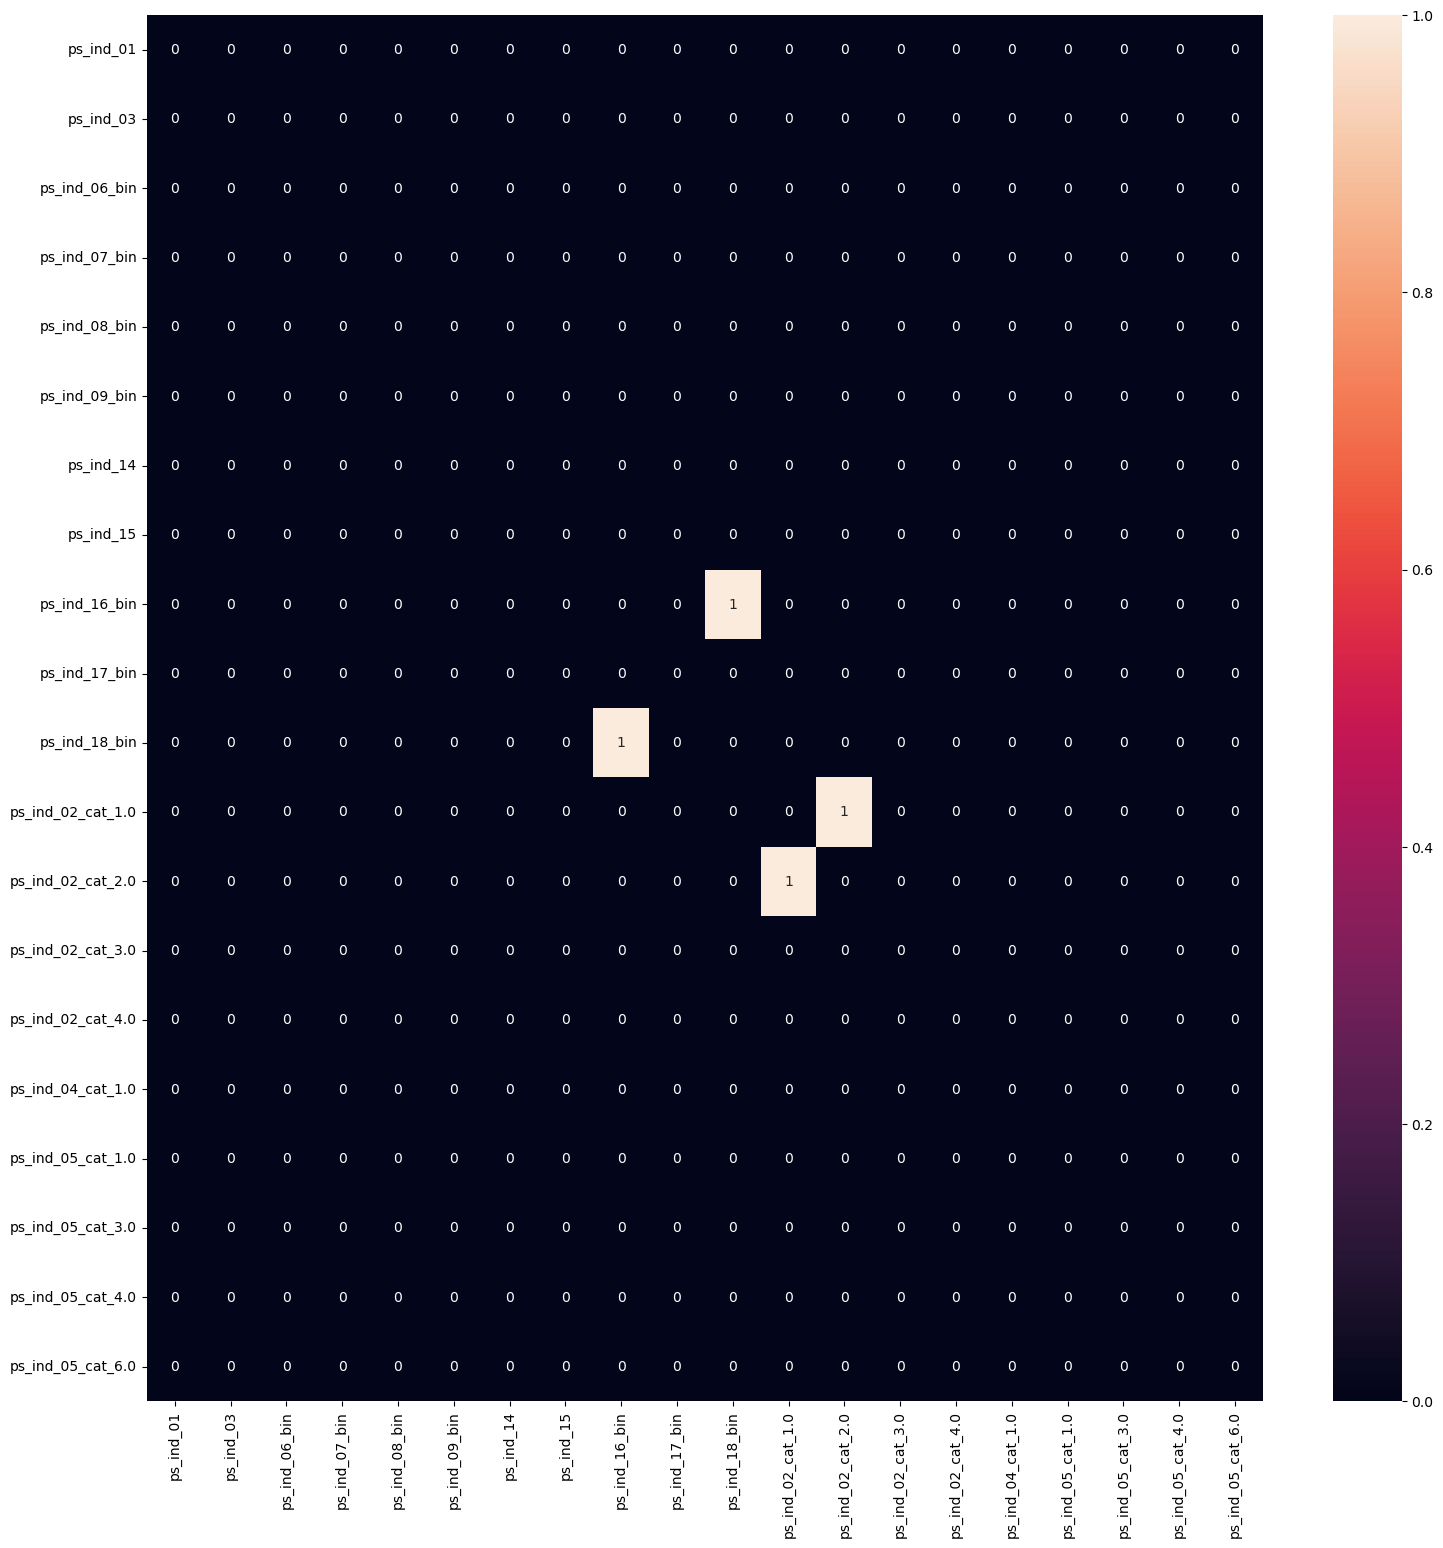

In [120]:
# Let's now find the correlation among 'ind' features
features_with_ind = [i for i in df_after_variance_removal.columns if 'ind' in i]

plt.figure(figsize=(18,18))
sns.heatmap(df_after_variance_removal[features_with_ind].corr() < -0.5 , annot=True)

#### As can be seen that the features 'ps_ind_16_bin' is highly correlated with 'ps_ind_17_bin' and 'ps_ind_18_bin', so we'll remove 'ps_ind_16_bin'

In [121]:
final_col.remove('ps_ind_16_bin')

final_col1.remove('ps_ind_16_bin')
final_col2.remove('ps_ind_16_bin')
final_col3.remove('ps_ind_16_bin')

<AxesSubplot: >

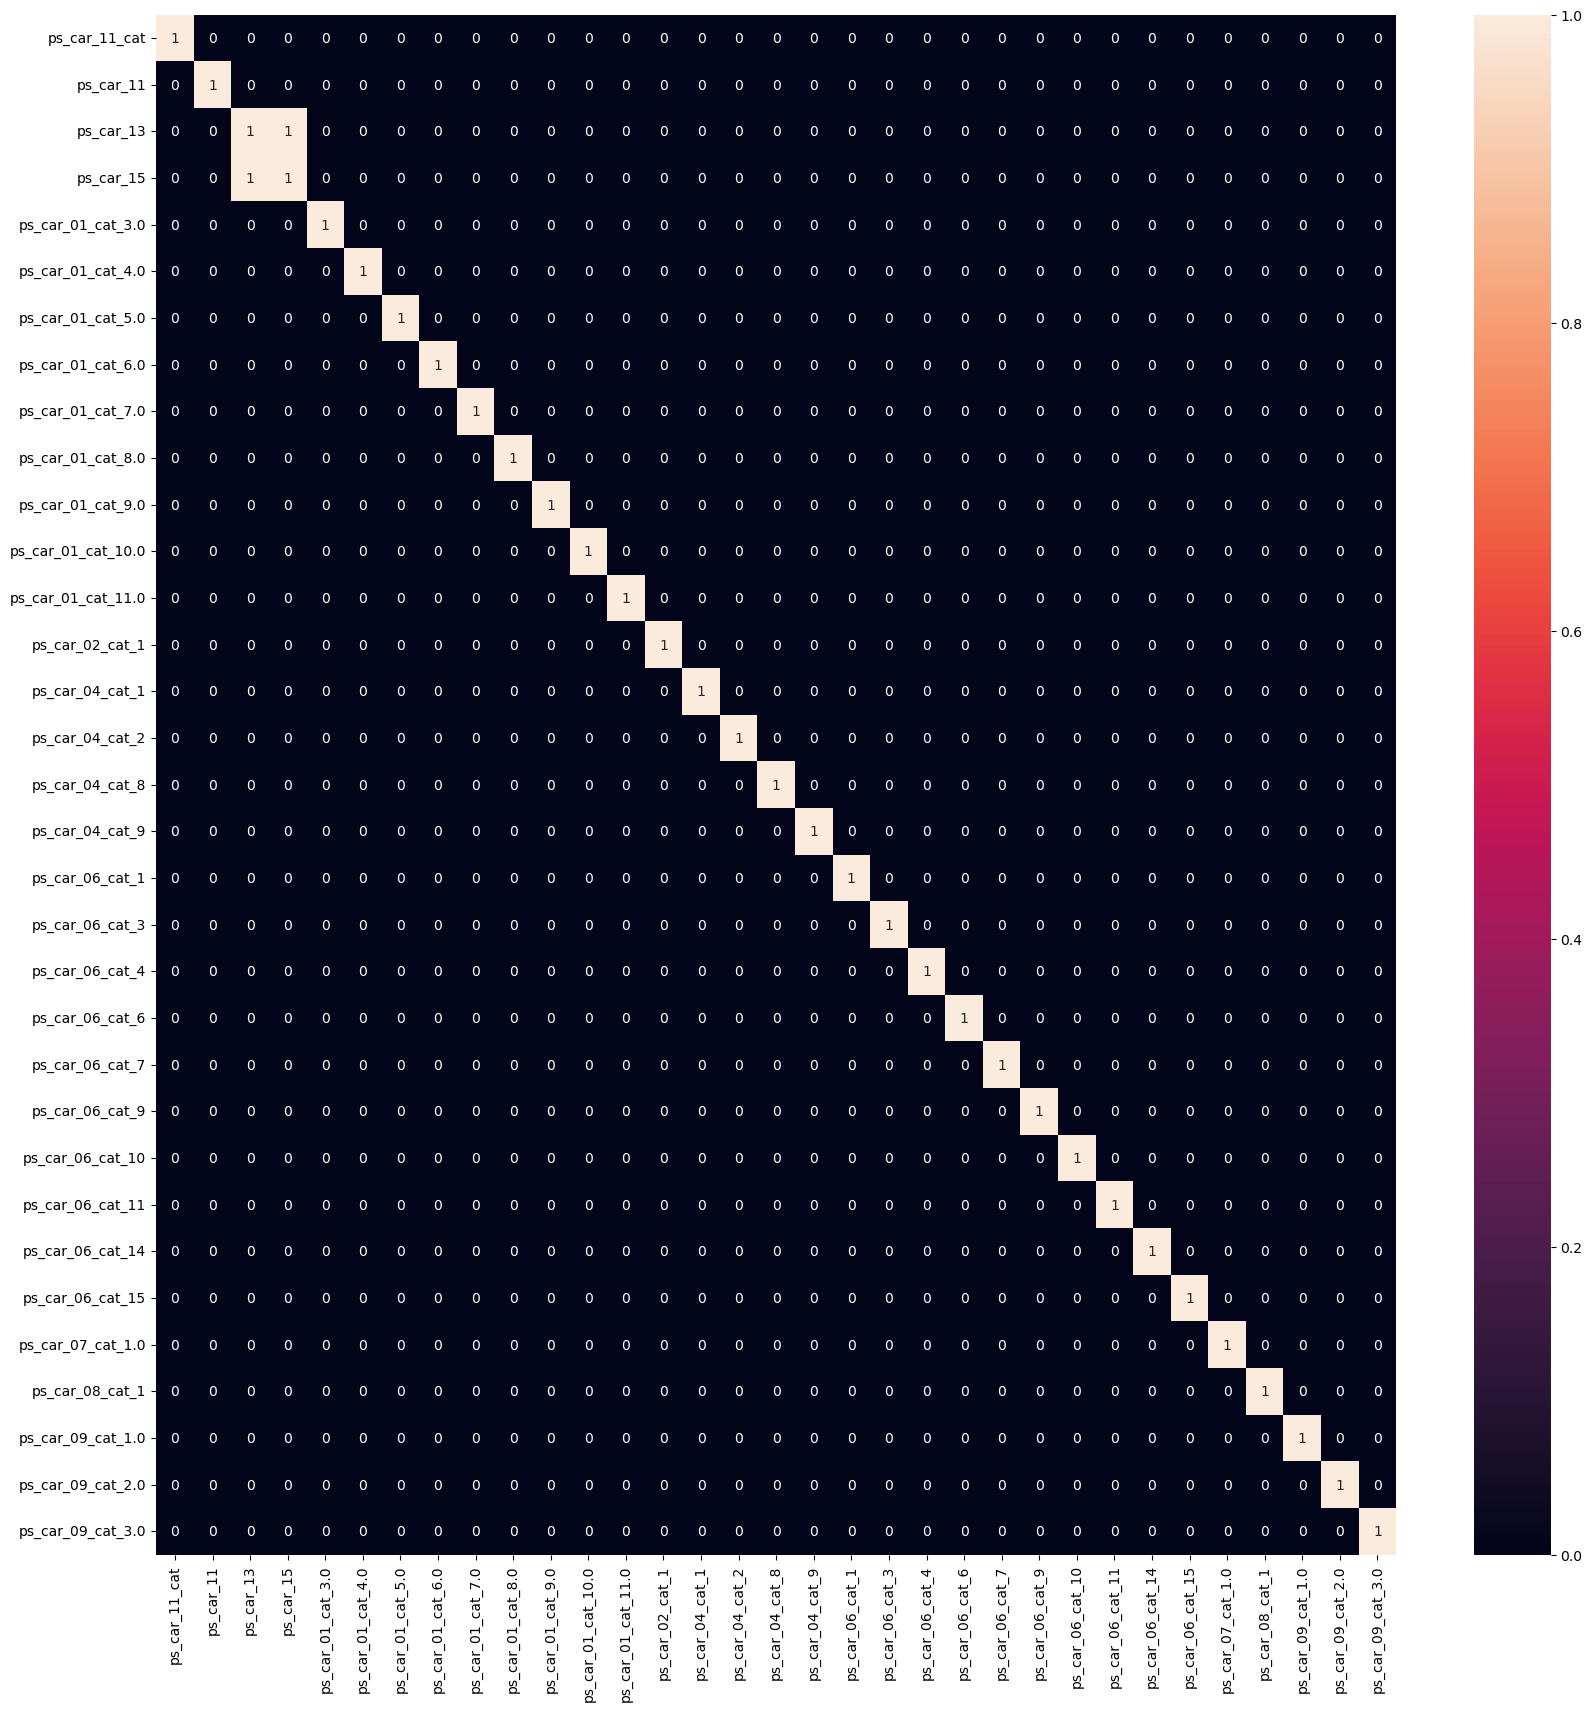

In [122]:
# Let's now find the correlation among 'car' features
features_with_car = [i for i in df_after_variance_removal.columns if 'car' in i]

plt.figure(figsize=(20,20))
sns.heatmap(df_after_variance_removal[features_with_car].corr() > 0.5, annot=True)

#### As can be seen the feature "ps_car_13" and "ps_car_15" are highly correlated, so we'll remove "ps_car_15"

In [123]:
final_col.remove("ps_car_15")

final_col1.remove("ps_car_15")
final_col2.remove("ps_car_15")
final_col3.remove("ps_car_15")

In [124]:
# the final dataframe 
df_new = df_after_variance_removal[final_col]
df_new.shape

(485960, 55)

In [125]:
before_encoding_balanced = before_encoding_balanced[final_col1]
data_unbalance = data_unbalance[final_col2]
data_without_encoding = data_without_encoding[final_col3]

before_encoding_balanced.shape, data_unbalance.shape, data_without_encoding.shape

((401795, 39), (429040, 39), (429040, 39))

#### Splitting X and Y

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# For balanced data
Y = df_new['target']
X = df_new.drop('target', axis=1)

In [128]:
X.shape, Y.shape

((485960, 54), (485960,))

In [129]:
# Splitting on balanced data
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=23)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((340172, 54), (145788, 54), (340172,), (145788,))

In [130]:
# For before_encoding_balanced
Y1 = before_encoding_balanced['target']
X1 = before_encoding_balanced.drop('target', axis=1)

# Splitting
train_x1, test_x1, train_y1, test_y1 = train_test_split(X1, Y1, test_size=0.3, random_state=23)
train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape

((281256, 38), (120539, 38), (281256,), (120539,))

In [131]:
# For data_unbalance
Y2 = data_unbalance['target']
X2 = data_unbalance.drop('target', axis=1)

# Splitting 
train_x2, test_x2, train_y2, test_y2 = train_test_split(X2, Y2, test_size=0.3, random_state=23)
train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape

((300328, 38), (128712, 38), (300328,), (128712,))

In [132]:
# For data_without_encoding
Y3 = data_without_encoding['target']
X3 = data_without_encoding.drop('target', axis=1)

# Splitting 
train_x3, test_x3, train_y3, test_y3 = train_test_split(X3, Y3, test_size=0.3, random_state=23)
train_x3.shape, test_x3.shape, train_y3.shape, test_y3.shape

((300328, 38), (128712, 38), (300328,), (128712,))

### 17. In nominal and interval features which features are suitable for StandardScaler?

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
# For balanced data
scaled_x = StandardScaler().fit_transform(train_x)
scaled_test_x = StandardScaler().fit_transform(test_x)

In [135]:
# For before_encoding_balanced
scaled_x1 = StandardScaler().fit_transform(train_x1)
scaled_test_x1 = StandardScaler().fit_transform(test_x1)

# For data_unbalance
scaled_x2 = StandardScaler().fit_transform(train_x2)
scaled_test_x2 = StandardScaler().fit_transform(test_x2)


# For data_without_encoding
scaled_x3 = StandardScaler().fit_transform(train_x3)
scaled_test_x3 = StandardScaler().fit_transform(test_x3)

### 18. Summarize the learnings of ED
 1. Imbalanced dataset needs to be balanced by undersampling or oversampling.
 

 2. If the data is in millions, then we have to do undersampling otherwise we can do oversampling. Oversampling is done by SMOTE  method of imblearn.
 

 3. Most of the features are not significantly correlated. Those correlated can be removed.
 

 4. I have removed the missing values in dataset by their mean or mode.
 

 5. We have to remove outliers which have lower values than first quantile and more than third quantile.
 

 6. We have divided the dataframe into categorical, ordinal, continuous and binary and seen their relation with each other.
 

 7. We can remove features with low variance by VarianceThresold.
 

 8. We have scaled the data by Standard Scaler method.

#### Modelling

In [136]:
# Index to my code above
# 1--> For before_encoding_balanced  --> Balanced
# 2--> For data_unbalance
# 3--> For data_without_encoding   --> Without balanced

### 1. The Simple LogisticRegression Model seem to have high accuracy. Is that what we need at all? What is the problem with this model?

#### Logistic Regression

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [138]:
# Creating object for Logistic Regression
log_reg1 = LogisticRegression(max_iter=1000)

# Fitting the model
log_reg_p1 = log_reg1.fit(scaled_x2, train_y2)

# Making predictions
y_pred_logreg1 = log_reg_p1.predict(scaled_test_x2)

In [139]:
from sklearn.metrics import classification_report

# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(test_y2,y_pred_logreg1))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y2,y_pred_logreg1))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y2,y_pred_logreg1))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    124340
           1       0.00      0.00      0.00      4372

    accuracy                           0.97    128712
   macro avg       0.48      0.50      0.49    128712
weighted avg       0.93      0.97      0.95    128712

#### Accuracy Score ####
accuracy score :  0.9660326931443843

#### Confusion Matrix ####
[[124340      0]
 [  4372      0]]


D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 2. Why do you think f1-score is 0.0?

#### f1 score is 0 because precision and recall values are zero.

### 3. What is the precision and recall score for the model?

#### precision score is 0.0

#### recall score is 0.0

### 4. What is the most important inference you can draw from the result?

As can be seen from the confusion matrix we have False Negative = 4372 which is wrongly predicted as it's the number of people who shouldn't be given the insurance but with prediction they were provided. This high number for FN will lead to loss for the company so for a good model we should have High TP and High TN and low FP and FN.

### 5. What is the accuracy score and f1-score for the improved Logistic Regression model?

In [140]:
# Creating object for Logistic Regression
log_reg = LogisticRegression(max_iter=1000)

# Fitting the model
log_reg_p = log_reg.fit(scaled_x, train_y)

# Making predictions
y_pred_logreg = log_reg_p.predict(scaled_test_x)

In [141]:
# Using function for evaluating the model output

print("#### Classification Report ####")
print(classification_report(test_y,y_pred_logreg))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y,y_pred_logreg))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y,y_pred_logreg))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    130940
           1       0.99      0.52      0.68     14848

    accuracy                           0.95    145788
   macro avg       0.97      0.76      0.83    145788
weighted avg       0.95      0.95      0.94    145788

#### Accuracy Score ####
accuracy score :  0.950983620051033

#### Confusion Matrix ####
[[130895     45]
 [  7101   7747]]


### 6. Why do you think f1-score has improved?

As compared to the previous model where precision and recall were both 0 but here precision = 1.0 and recal = 0.53 which has lead to an improved f1-score = 0.69.

### 7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement

In [142]:
from sklearn.svm import LinearSVC

#### With dual=False, max_iter=500

In [143]:
lsvc1= LinearSVC(dual= False, max_iter=500)

lsvc_p1 = lsvc1.fit(scaled_x, train_y)

y_pred_lsvc1 = lsvc_p1.predict(scaled_test_x)

In [144]:
print("#### Classification Report ####")
print(classification_report(test_y,y_pred_lsvc1))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y,y_pred_lsvc1))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y,y_pred_lsvc1))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    130940
           1       1.00      0.50      0.67     14848

    accuracy                           0.95    145788
   macro avg       0.97      0.75      0.82    145788
weighted avg       0.95      0.95      0.94    145788

#### Accuracy Score ####
accuracy score :  0.9492413641726343

#### Confusion Matrix ####
[[130940      0]
 [  7400   7448]]


#### With dual=True, max_iter=1000

In [145]:
lsvc2= LinearSVC(dual= True, max_iter=1000)

lsvc_p2 = lsvc2.fit(scaled_x, train_y)

y_pred_lsvc2 = lsvc_p2.predict(scaled_test_x)

D:\Installed\Anaconda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [146]:
print("#### Classification Report ####")
print(classification_report(test_y,y_pred_lsvc2))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y,y_pred_lsvc2))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y,y_pred_lsvc2))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    130940
           1       1.00      0.50      0.67     14848

    accuracy                           0.95    145788
   macro avg       0.97      0.75      0.82    145788
weighted avg       0.95      0.95      0.94    145788

#### Accuracy Score ####
accuracy score :  0.9492413641726343

#### Confusion Matrix ####
[[130940      0]
 [  7400   7448]]


### 8. For -- SVC with Imbalance Check & Feature Optimization & only 100K Records is there improvement in scores?

In [147]:
train_x2.shape

(300328, 38)

In [148]:
x_svc2= scaled_x2[:100000, ]
y_svc2= train_y2[:100000, ]

In [149]:
from sklearn import svm
clf = svm.SVC(kernel='linear')

clf_p = clf.fit(x_svc2, y_svc2)

y_pred_svc = clf_p.predict(test_x2)

D:\Installed\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [150]:
print("#### Classification Report ####")
print(classification_report(test_y2,y_pred_svc))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y2,y_pred_svc))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y2,y_pred_svc))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    124340
           1       0.00      0.00      0.00      4372

    accuracy                           0.97    128712
   macro avg       0.48      0.50      0.49    128712
weighted avg       0.93      0.97      0.95    128712

#### Accuracy Score ####
accuracy score :  0.9660326931443843

#### Confusion Matrix ####
[[124340      0]
 [  4372      0]]


D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

In [151]:
from xgboost import XGBClassifier

In [152]:
scaled_x1.shape

(281256, 38)

In [166]:
# Balanced non-encoded
xg = XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 50,
                        alpha = 10, n_estimators = 100)
xg.fit(scaled_x1, train_y1)
y_pred_xgb1= xg.predict(scaled_test_x1)

In [167]:
print("#### Classification Report ####")
print(classification_report(test_y1, y_pred_xgb1))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y1, y_pred_xgb1))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y1, y_pred_xgb1))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.97      0.15      0.27    110498
           1       0.09      0.95      0.17     10041

    accuracy                           0.22    120539
   macro avg       0.53      0.55      0.22    120539
weighted avg       0.90      0.22      0.26    120539

#### Accuracy Score ####
accuracy score :  0.21959697691203678

#### Confusion Matrix ####
[[16968 93530]
 [  539  9502]]


In [156]:
f1_score(test_y1, y_pred_xgb1)

0.15673451334423302

In [157]:
test_y1.value_counts()

0    110498
1     10041
Name: target, dtype: int64

In [158]:
y_pred_xgb1.tolist().count(0), y_pred_xgb1.tolist().count(1)

(3971, 116568)

### 10. What is the increase in number of features after onehotencoding of the data?

In [159]:
print("Number of features before applying get_dummies are: %d"%data_copied.shape[1])
print("Number of features after applying get_dummies are: %d"%dummy_df.shape[1])

Number of features before applying get_dummies are: 56
Number of features after applying get_dummies are: 102


In [160]:
print("Therefore increase in the features is {}".format(102-56))

Therefore increase in the features is 46


### 11. Is there any improvement in scores after encoding?

In [162]:
scaled_x.shape

(340172, 54)

In [168]:
# Balanced With encoding
xg= XGBClassifier(objective='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 50,
                        alpha = 10, n_estimators = 100)
xg.fit(scaled_x, train_y)
y_pred_xgb= xg.predict(scaled_test_x)

In [169]:
print("#### Classification Report ####")
print(classification_report(test_y, y_pred_xgb))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y, y_pred_xgb))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y, y_pred_xgb))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.97      0.51      0.67    130940
           1       0.16      0.84      0.27     14848

    accuracy                           0.54    145788
   macro avg       0.56      0.68      0.47    145788
weighted avg       0.88      0.54      0.63    145788

#### Accuracy Score ####
accuracy score :  0.5448322221307652

#### Confusion Matrix ####
[[66919 64021]
 [ 2337 12511]]


In [165]:
import xgboost as xgb
params = {'eta': 0.02, 'max_depth': 4, 'subsample': 0.9, 'colsample_bytree': 0.9, 
          'objective': 'binary:logistic', 'eval_metric': 'auc', 'silent': True}
d_train = xgb.DMatrix(scaled_x, train_y)
d_valid = xgb.DMatrix(scaled_test_x, test_y)
watchlist = [(d_train, 'train'), (d_valid, 'valid')]
nrounds=2500
xgb_model_log = xgb.train(params, d_train, nrounds, watchlist, early_stopping_rounds=100,
                           maximize=True, verbose_eval=100)

D:\Installed\Anaconda\lib\site-packages\xgboost\core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[19:43:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0]	train-auc:0.72622	valid-auc:0.72145
[100]	train-auc:0.85069	valid-auc:0.83593
[200]	train-auc:0.86653	valid-auc:0.83396
[235]	train-auc:0.86880	valid-auc:0.83254


### 12. If not missing a positive sample is the priority which model is best so far?

Logistic regression

### 13. If not marking negative sample as positive is top priority, which model is best so far?

XG Boost

### 14. Do you think using AdaBoost can give any significant improvement over XGBoost?

In [171]:
from sklearn.ensemble import AdaBoostClassifier

In [172]:
adaBoost = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
ada = adaBoost.fit(scaled_x, train_y)
y_pred_ada = ada.predict(scaled_test_x)

In [173]:
print("#### Classification Report ####")
print(classification_report(test_y, y_pred_ada))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y, y_pred_ada))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y, y_pred_ada))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    130940
           1       0.98      0.54      0.70     14848

    accuracy                           0.95    145788
   macro avg       0.97      0.77      0.84    145788
weighted avg       0.95      0.95      0.95    145788

#### Accuracy Score ####
accuracy score :  0.9520536669684748

#### Confusion Matrix ####
[[130776    164]
 [  6826   8022]]


### 15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size

#### MLP model

MLP classifier is neural network model and to choose the right no. of layers and size there is some of methods help us to choose the correct number :

The no. of hidden neurons should be between the size of the input layer and the size of the output layer.

The no. of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

The no. of hidden neurons should be less than twice the size of the input layer.

In [175]:
from sklearn.neural_network import MLPClassifier

In [176]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.000000001, activation='relu')
mlp.fit(scaled_x, train_y)
y_pred_mlp = mlp.predict(scaled_test_x)

Iteration 1, loss = 0.18064539
Iteration 2, loss = 0.16556937
Iteration 3, loss = 0.16276830
Iteration 4, loss = 0.16104182
Iteration 5, loss = 0.15945610
Iteration 6, loss = 0.15808569
Iteration 7, loss = 0.15687770
Iteration 8, loss = 0.15570906
Iteration 9, loss = 0.15452117
Iteration 10, loss = 0.15322187
Iteration 11, loss = 0.15203810
Iteration 12, loss = 0.15068645
Iteration 13, loss = 0.14942642
Iteration 14, loss = 0.14824792
Iteration 15, loss = 0.14687680
Iteration 16, loss = 0.14563950
Iteration 17, loss = 0.14408563
Iteration 18, loss = 0.14293840
Iteration 19, loss = 0.14145135
Iteration 20, loss = 0.14039666
Iteration 21, loss = 0.13887835
Iteration 22, loss = 0.13787916
Iteration 23, loss = 0.13634616
Iteration 24, loss = 0.13539831
Iteration 25, loss = 0.13395739
Iteration 26, loss = 0.13277002
Iteration 27, loss = 0.13199638
Iteration 28, loss = 0.13076151
Iteration 29, loss = 0.12941022
Iteration 30, loss = 0.12857478
Iteration 31, loss = 0.12743184
Iteration 32, los

D:\Installed\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [177]:
print("#### Classification Report ####")
print(classification_report(test_y, y_pred_mlp))

print("#### Accuracy Score ####")
print('accuracy score : ',accuracy_score(test_y, y_pred_mlp))

print("\n#### Confusion Matrix ####")
print(confusion_matrix(test_y, y_pred_mlp))

#### Classification Report ####
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    130940
           1       0.76      0.62      0.68     14848

    accuracy                           0.94    145788
   macro avg       0.86      0.80      0.83    145788
weighted avg       0.94      0.94      0.94    145788

#### Accuracy Score ####
accuracy score :  0.9413531977940571

#### Confusion Matrix ####
[[127996   2944]
 [  5606   9242]]


### 16. At what layer size we get the best f1-score?

In [178]:
for i in [100, 200, 250, 300, 350, 400, 500, 600]:
    mlp1 = MLPClassifier(hidden_layer_sizes=(i,i,i), max_iter=300, alpha=0.0001,solver='adam', verbose=1,  
                    random_state=23, tol=0.0001, activation='relu')
    mlp1.fit (scaled_x, train_y)
    y_pred_mlp1 = mlp1.predict(scaled_test_x)
    
    f1 = f1_score(test_y, y_pred_mlp1)
    
    print("The f1 score for {} is {}".format(i,f1))

Iteration 1, loss = 0.18064539
Iteration 2, loss = 0.16556937
Iteration 3, loss = 0.16276830
Iteration 4, loss = 0.16104182
Iteration 5, loss = 0.15945610
Iteration 6, loss = 0.15808569
Iteration 7, loss = 0.15687770
Iteration 8, loss = 0.15570906
Iteration 9, loss = 0.15452117
Iteration 10, loss = 0.15322187
Iteration 11, loss = 0.15203810
Iteration 12, loss = 0.15068645
Iteration 13, loss = 0.14942642
Iteration 14, loss = 0.14824792
Iteration 15, loss = 0.14687680
Iteration 16, loss = 0.14563950
Iteration 17, loss = 0.14408563
Iteration 18, loss = 0.14293840
Iteration 19, loss = 0.14145135
Iteration 20, loss = 0.14039666
Iteration 21, loss = 0.13887835
Iteration 22, loss = 0.13787916
Iteration 23, loss = 0.13634616
Iteration 24, loss = 0.13539831
Iteration 25, loss = 0.13395739
Iteration 26, loss = 0.13277002
Iteration 27, loss = 0.13199638
Iteration 28, loss = 0.13076151
Iteration 29, loss = 0.12941022
Iteration 30, loss = 0.12857478
Iteration 31, loss = 0.12743184
Iteration 32, los

Iteration 253, loss = 0.07717884
Iteration 254, loss = 0.07727589
Iteration 255, loss = 0.07742180
Iteration 256, loss = 0.07713950
Iteration 257, loss = 0.07743825
Iteration 258, loss = 0.07740977
Iteration 259, loss = 0.07745504
Iteration 260, loss = 0.07727436
Iteration 261, loss = 0.07635541
Iteration 262, loss = 0.07679637
Iteration 263, loss = 0.07650678
Iteration 264, loss = 0.07752770
Iteration 265, loss = 0.07654649
Iteration 266, loss = 0.07717298
Iteration 267, loss = 0.07726498
Iteration 268, loss = 0.07634544
Iteration 269, loss = 0.07628625
Iteration 270, loss = 0.07754788
Iteration 271, loss = 0.07608761
Iteration 272, loss = 0.07685905
Iteration 273, loss = 0.07665420
Iteration 274, loss = 0.07642786
Iteration 275, loss = 0.07636088
Iteration 276, loss = 0.07662824
Iteration 277, loss = 0.07536216
Iteration 278, loss = 0.07665475
Iteration 279, loss = 0.07688405
Iteration 280, loss = 0.07599945
Iteration 281, loss = 0.07537988
Iteration 282, loss = 0.07627702
Iteration 

Iteration 213, loss = 0.03149600
Iteration 214, loss = 0.03133290
Iteration 215, loss = 0.03054753
Iteration 216, loss = 0.03021226
Iteration 217, loss = 0.03004865
Iteration 218, loss = 0.03141443
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
The f1 score for 200 is 0.6682205035844192
Iteration 1, loss = 0.17628414
Iteration 2, loss = 0.16470652
Iteration 3, loss = 0.16203711
Iteration 4, loss = 0.16005724
Iteration 5, loss = 0.15844126
Iteration 6, loss = 0.15704409
Iteration 7, loss = 0.15497852
Iteration 8, loss = 0.15316809
Iteration 9, loss = 0.15129210
Iteration 10, loss = 0.14890339
Iteration 11, loss = 0.14678089
Iteration 12, loss = 0.14449827
Iteration 13, loss = 0.14208636
Iteration 14, loss = 0.13913000
Iteration 15, loss = 0.13666594
Iteration 16, loss = 0.13413769
Iteration 17, loss = 0.13130138
Iteration 18, loss = 0.12832448
Iteration 19, loss = 0.12538150
Iteration 20, loss = 0.12243777
Iteration 21, loss = 0.11933894
Iterat

D:\Installed\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

#### We can see with size of 100 we are getting the best f1-score.